In [1]:
"""Model performance on different complexity problems."""
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from visualize_utils import *

################################################################################################
#### Plot setting                                                                           ####
################################################################################################

rcParams['figure.dpi'] = 500
rcParams['savefig.dpi'] = 500
rcParams['figure.figsize'] = 15, 12
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 18
rcParams['axes.labelsize'] = 18
rcParams['axes.titlesize'] = 18
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18
rcParams['legend.fontsize'] = 18
rcParams['figure.titlesize'] = 18
rcParams['markers.fillstyle'] = 'none'

################################################################################################
#### Load and aggregate the results                                                         ####
################################################################################################
PRE_DIR = '../'
RESULT_DIR = PRE_DIR + 'rq3'

In [2]:
difficulty_sets = []
model_names = []
problem_names = []
finetune_times = []
avg_accuracies = []
raw_accuracies = []
raw_failures = []

for dir in os.listdir(RESULT_DIR):
    if not os.path.isdir(os.path.join(RESULT_DIR, dir)):
        continue
    mode, difficulty_set = dir.split('_')
    current_dir = os.path.join(RESULT_DIR, dir)
    for file in os.listdir(current_dir):
        if file.endswith('.json'):
            file_infos = file.split('.')[0].split('_')
            model_name = file_infos[0]
            problem_name = file_infos[1]
            finetune_time = file_infos[2][-1] if len(file_infos) == 3 else '0'
            performance = calculate_accuracy(fetch_one_file(file, current_dir, model_name, problem_name))
            raw_accuracy = performance['accuracy']
            num_levels = len(raw_accuracy)
            avg_accuracy = np.average(raw_accuracy, weights=list(range(1, 11)))
            avg_failure = np.mean(performance['failed'])

            difficulty_sets.append(difficulty_set)
            model_names.append(model_name)
            problem_names.append(problem_name)
            finetune_times.append(finetune_time)
            avg_accuracies.append(avg_accuracy)
            raw_accuracies.append(np.mean(raw_accuracy))
            raw_failures.append(avg_failure)

qwen on sppResults has 3 failed results
mistral on sppResults has 2 failed results
gpt-4-1106-preview on kspResults has 34 failed results
qwen on kspResults has 21 failed results
mistral on kspResults has 13 failed results
gpt-4-1106-preview on sppResults has 1 failed results
phi-2 on sppResults has 4 failed results
qwen on sppResults has 12 failed results
mistral on sppResults has 71 failed results
phi-2 on kspResults has 3 failed results
gpt-4-1106-preview on kspResults has 4 failed results
qwen on kspResults has 7 failed results
mistral on kspResults has 99 failed results
gpt-4-1106-preview on sppResults has 3 failed results
phi-2 on sppResults has 4 failed results
qwen on sppResults has 3 failed results
mistral on sppResults has 9 failed results
qwen on kspResults has 55 failed results
mistral on kspResults has 26 failed results
gpt-4-1106-preview on hard has 1 failed results
qwen on sppResults has 2 failed results
mistral on sppResults has 23 failed results
qwen on kspResults has 

In [3]:
new_df = pd.DataFrame({
    'difficulty_set': difficulty_sets,
    'model_name': model_names,
    'problem_name': problem_names,
    'finetune_time': finetune_times,
    'avg_accuracy': avg_accuracies,
    'raw_accuracy': raw_accuracies,
    'raw_failure': raw_failures
})

In [4]:
new_df['model_name'] = new_df['model_name'].map(lambda x: model_mapper[x] if x in model_mapper else x)
new_df['problem_name'] = new_df['problem_name'].map({'sppResults': 'SPP', 'kspResults': 'KSP'})

In [5]:
new_df

,difficulty_set,model_name,problem_name,finetune_time,avg_accuracy,raw_accuracy,raw_failure
0,medium,Qwen-14b,SPP,0,0.134545,0.12,0.03
1,medium,Mistral-7b,SPP,0,0.000000,0.00,0.02
2,medium,Phi-2,KSP,0,0.000000,0.00,0.00
3,medium,GPT 4 Turbo,KSP,0,0.030909,0.05,0.34
4,medium,Qwen-14b,KSP,0,0.000000,0.00,0.21
...,...,...,...,...,...,...,...
90,medium,Mistral-7b,SPP,1,0.000000,0.00,0.00
91,medium,Qwen-14b,KSP,1,0.000000,0.00,0.46
92,medium,Phi-2,KSP,4,0.000000,0.00,0.00
93,medium,Phi-2,SPP,4,0.043636,0.06,0.09


In [6]:
np.min(new_df['avg_accuracy'] - new_df['raw_accuracy'])

-0.15454545454545454

In [7]:
len(new_df['avg_accuracy'] == 0)

95

In [8]:
len(new_df['raw_accuracy'] == 0)

95

['Qwen-14b' 'Mistral-7b' 'GPT 4 Turbo' 'Phi-2']
['Phi-2' 'GPT 4 Turbo' 'Qwen-14b' 'Mistral-7b']
['Qwen-14b' 'Mistral-7b' 'GPT 4 Turbo' 'Phi-2']
['Phi-2' 'GPT 4 Turbo' 'Qwen-14b' 'Mistral-7b']


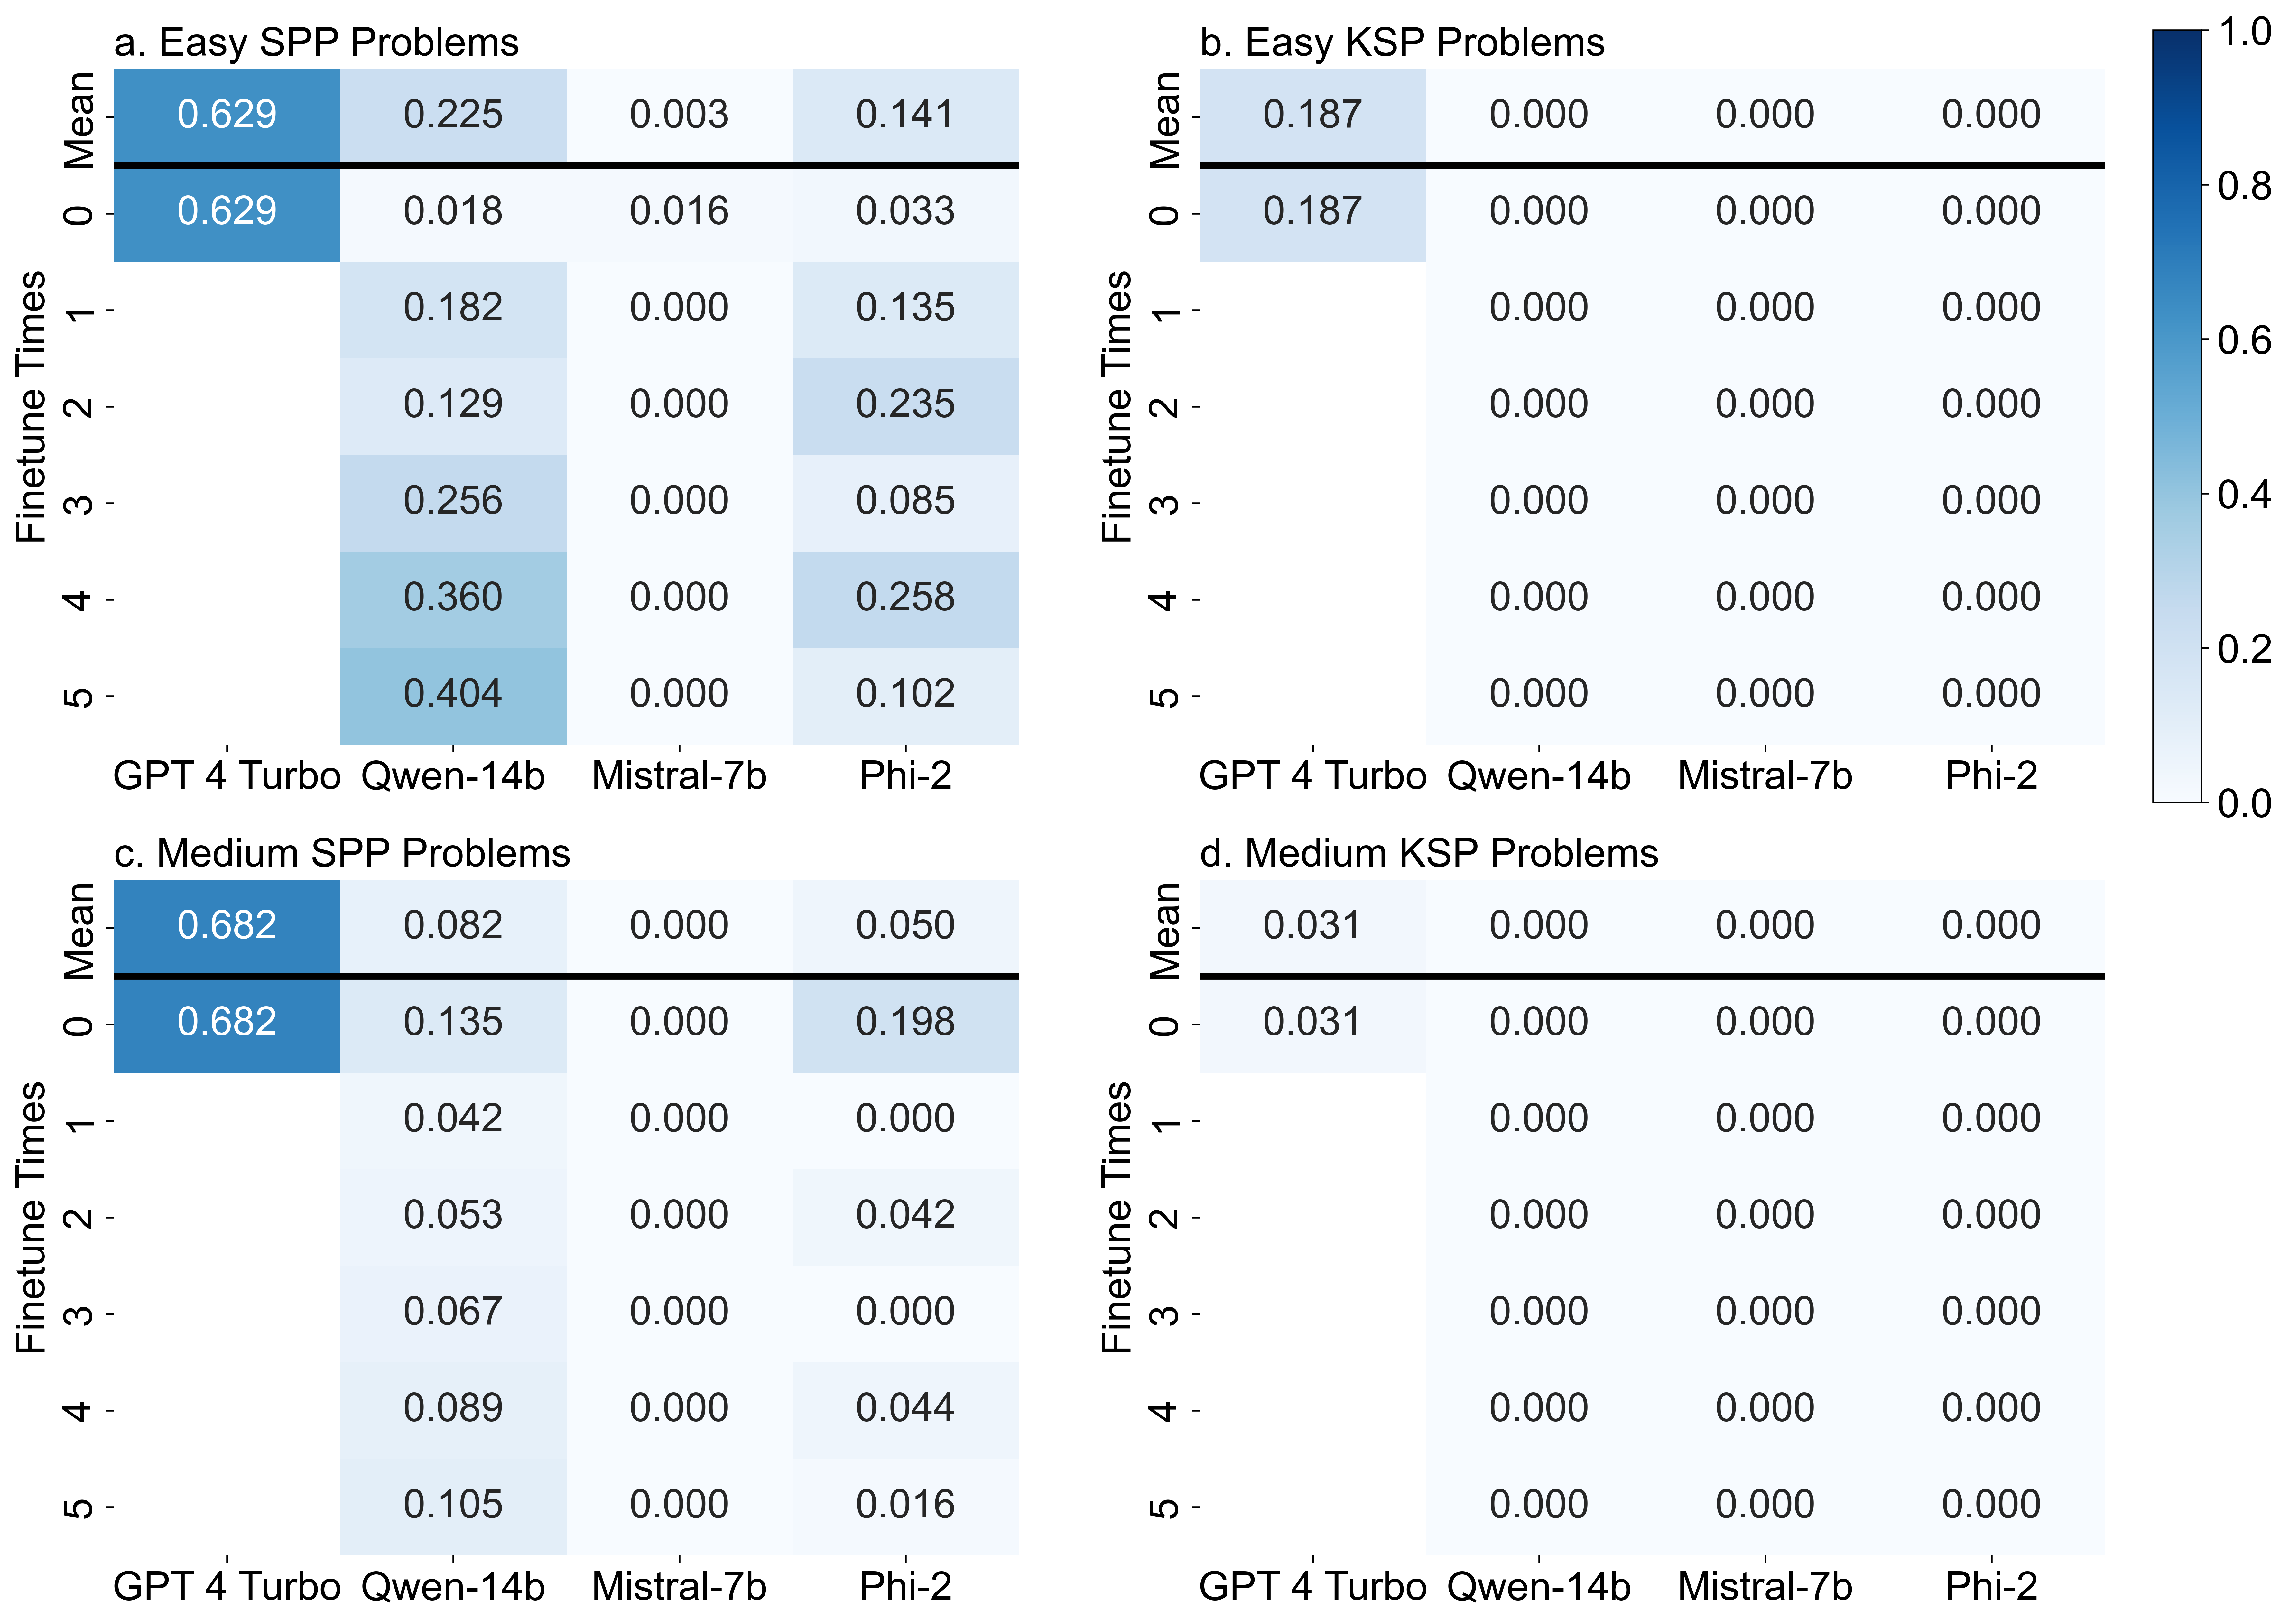

In [9]:
from itertools import product

problem_diff = list(product(['easy', 'medium'], ['SPP', 'KSP']))

fig, _ = plt.subplots(2, 2)
for i, (difficulty, problem) in enumerate(problem_diff):
        problem_df = new_df[new_df['problem_name'] == problem]
        difficulty_df = problem_df[problem_df['difficulty_set'] == difficulty]
        print(difficulty_df.model_name.unique())
        difficulty_df_pivot = difficulty_df.pivot_table(index='finetune_time', columns='model_name', values='avg_accuracy', aggfunc='mean')
        mean_df = difficulty_df_pivot.mean(axis=0).to_frame().T
        # set latex bold of 'Mean'
        mean_df.index = ['Mean']
        df = pd.concat([mean_df, difficulty_df_pivot])[['GPT 4 Turbo', 'Qwen-14b', 'Mistral-7b', 'Phi-2']]
        plt.subplot(2, 2, i+1)
        sns.heatmap(df, annot=True, cmap='Blues', vmin=0.0, vmax=1.0, fmt='.3f', cbar=False)
        # add a horizontal line
        plt.axhline(y=1, color='black', linewidth=3)
        plt.xlabel(None)
        plt.ylabel('Finetune Times')
        plt.title(f'{chr(97 + i)}. {difficulty.title()} {problem} Problems',  loc='left')
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.97, 0.5, 0.02, 0.4])
fig.colorbar(ax=fig.axes, cax=cbar_ax,
                mappable=fig.axes[0].collections[0], orientation='vertical')
# plt.savefig(f'figures/ablation/{problem}_accuracy.png', bbox_inches='tight')
plt.savefig(PRE_DIR + f'figures/rq3/rq3_weighted_accuracy.png', bbox_inches='tight')